# Predictive Analysis

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import pandas as pd

In [5]:
visitors_final = pd.read_csv("final_analysis_data_visitors.csv")

In [ ]:
# Assuming visitors_final['answer'] contains free-text preferences
answers = visitors_final['answer'].dropna().astype(str)

# TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(answers)


In [9]:

# Topic Modeling with NMF to uncover themes
nmf = NMF(n_components=5, random_state=42)
W = nmf.fit_transform(tfidf_matrix)
H = nmf.components_

# Top words per topic
feature_names = vectorizer.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(H):
    top_words = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    topics.append({"Topic": topic_idx + 1, "Top Keywords": top_words})

topics_df = pd.DataFrame(topics)
print(" Predicted Trends / New Category Ideas:\n")
print(topics_df)


 Predicted Trends / New Category Ideas:

   Topic                                       Top Keywords
0      1  [agent, travel, solutions, industry, information]
1      2      [services, products, source, promote, guided]
2      3     [influence, responsibility, joint, sole, tour]
3      4        [rubles, million, 10, general, information]
4      5      [role, advisory, responsibility, joint, sole]


## Cluster Analysis

In [11]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
answer_series = visitors_final['answer'].dropna().astype(str)
answer_indices = answer_series.index

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(answer_series)

# Cluster visitors based on answer embeddings
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Assign clusters back to the original DataFrame only at valid indices
visitors_final.loc[answer_indices, 'cluster'] = clusters


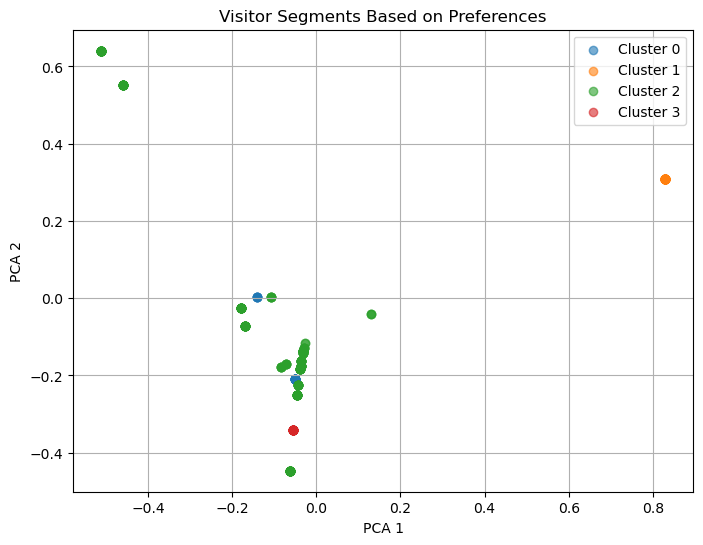

In [21]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(8, 6))
for cluster_id in range(num_clusters):
    plt.scatter(
        reduced_data[clusters == cluster_id, 0],
        reduced_data[clusters == cluster_id, 1],
        label=f'Cluster {cluster_id}',
        alpha=0.6
    )
plt.title('Visitor Segments Based on Preferences')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.savefig("Visitor Segments Based on Preferences.png")
plt.show()


